In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('data/Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Serial No.'],inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [10]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=.2)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [14]:
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [15]:
import tensorflow

In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model=Sequential()

In [18]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [21]:
history=model.fit(x_test_scaled,y_train,epochs=100,validation_split=.2)

Epoch 1/100

3/3 [==============================] - 1s 120ms/step - loss: 0.2252 - val_loss: 0.2113
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1971 - val_loss: 0.1859
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1704 - val_loss: 0.1627
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1471 - val_loss: 0.1418
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1257 - val_loss: 0.1231
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1074 - val_loss: 0.1065
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0908 - val_loss: 0.0924
Epoch 8/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0775 - val_loss: 0.0806
Epoch 9/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0663 - val_loss: 0.0714
Epoch 10/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0578 - val_loss: 0.0643
Epoch 11/100
3/3 

In [22]:
y_pred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test,y_pred)

-0.060717525723086085

In [25]:
import matplotlib.pyplot as plt

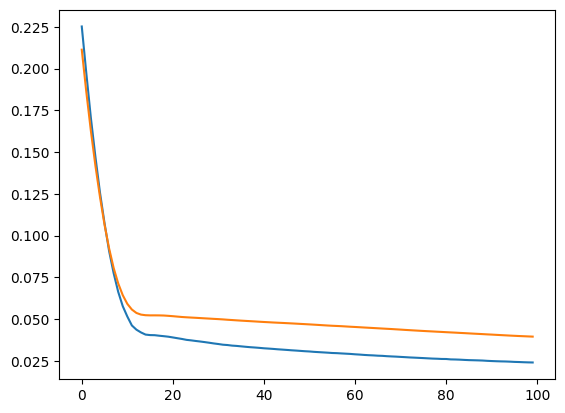

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])